In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

import re

In [77]:
def convert_google_sheet_url(url):
    # regular expression to match and capture the necessary part of the URL
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'
    # replace function to construct the new URL for CSV export
    # if gid is present in the URL, it includes it in the export URL, otherwise, it's omitted
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'
    # replace using regex
    new_url = re.sub(pattern, replacement, url)
    return new_url

game_data_2024_url = 'https://docs.google.com/spreadsheets/d/1F8GBPtLhugdO0pqrJe3O9fMPOYv3AqVRq8ouUZWZxIY/edit#gid=0'
new_game_data_2024_url = convert_google_sheet_url(game_data_2024_url)
game_data_2024 = pd.read_csv(new_game_data_2024_url)

game_data_2023_url = 'https://docs.google.com/spreadsheets/d/1F8GBPtLhugdO0pqrJe3O9fMPOYv3AqVRq8ouUZWZxIY/edit#gid=256452955'
new_game_data_2023_url = convert_google_sheet_url(game_data_2023_url)
game_data_2023 = pd.read_csv(new_game_data_2023_url)

In [78]:
game_data = pd.concat([game_data_2024, game_data_2023], ignore_index=True)

In [111]:
game_data['count'] = game_data['balls'].astype(str).str.cat(game_data['strikes'].astype(str), sep ='-')

In [112]:
game_data['count_advantage'] = 'neutral'
game_data.loc[(game_data['count'] == '1.0-0.0') | (game_data['count'] == '2.0-0.0') | (game_data['count'] == '2.0-1.0') | (game_data['count'] == '3.0-0.0') | (game_data['count'] == '3.0-1.0'), 'count_advantage'] = 'batter'
game_data.loc[(game_data['count'] == '0.0-1.0') | (game_data['count'] == '0.0-2.0') | (game_data['count'] == '1.0-2.0'), 'count_advantage'] = 'pitcher'

In [128]:
game_data.loc[game_data['pitcher'] == 'Julian Tymochko', 'pitch_type'].unique()

array(['FF', 'CH', 'CU', 'SL', 'UN'], dtype=object)

In [114]:
game_data['CH'] = game_data['pitch_type'] == 'CH'
game_data['CH'] = game_data['CH'].replace({True: 1, False: 0})

game_data['CU'] = game_data['pitch_type'] == 'CU'
game_data['CU'] = game_data['CU'].replace({True: 1, False: 0})

game_data['SL'] = game_data['pitch_type'] == 'SL'
game_data['SL'] = game_data['SL'].replace({True: 1, False: 0})

game_data['FF'] = game_data['pitch_type'] == 'FF'
game_data['FF'] = game_data['FF'].replace({True: 1, False: 0})

game_data['SI'] = game_data['pitch_type'] == 'SI'
game_data['SI'] = game_data['SI'].replace({True: 1, False: 0})

game_data['CR'] = game_data['pitch_type'] == 'CR'
game_data['CR'] = game_data['CR'].replace({True: 1, False: 0})

/var/folders/8k/8dtwqkz13n7_yyj509ckx33w0000gn/T/ipykernel_88745/3044767723.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  game_data['CH'] = game_data['CH'].replace({True: 1, False: 0})
/var/folders/8k/8dtwqkz13n7_yyj509ckx33w0000gn/T/ipykernel_88745/3044767723.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  game_data['CU'] = game_data['CU'].replace({True: 1, False: 0})
/var/folders/8k/8dtwqkz13n7_yyj509ckx33w0000gn/T/ipykernel_88745/3044767723.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will 

In [129]:
pitcher_data = game_data[(game_data['pitcher'] == 'Julian Tymochko') & (game_data['pitch_type'] != 'UN')]

In [130]:
pitcher_data.groupby('pitcher').agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    SL_pct=pd.NamedAgg(column='SL', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean'),
    SI_pct=pd.NamedAgg(column='SI', aggfunc='mean'),
    CR_pct=pd.NamedAgg(column='CR', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'SL_pct': 3, 'FF_pct': 3, 'SI_pct': 3, 'CR_pct': 3})

,N,CH_pct,CU_pct,SL_pct,FF_pct,SI_pct,CR_pct
pitcher,,,,,,,
Julian Tymochko,41,0.146,0.049,0.146,0.659,0.0,0.0


In [131]:
pitcher_stand_pct = pitcher_data.groupby('stand').agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    SL_pct=pd.NamedAgg(column='SL', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean'),
    SI_pct=pd.NamedAgg(column='SI', aggfunc='mean'),
    CR_pct=pd.NamedAgg(column='CR', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'SL_pct': 3, 'FF_pct': 3, 'SI_pct': 3, 'CR_pct': 3})
pitcher_stand_pct

,N,CH_pct,CU_pct,SL_pct,FF_pct,SI_pct,CR_pct
stand,,,,,,,
L,16,0.188,0.062,0.062,0.688,0.0,0.0
R,25,0.120,0.040,0.200,0.640,0.0,0.0


In [132]:
pitcher_data.groupby('count').agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    SL_pct=pd.NamedAgg(column='SL', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean'),
    SI_pct=pd.NamedAgg(column='SI', aggfunc='mean'),
    CR_pct=pd.NamedAgg(column='CR', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'SL_pct': 3, 'FF_pct': 3, 'SI_pct': 3, 'CR_pct': 3})

,N,CH_pct,CU_pct,SL_pct,FF_pct,SI_pct,CR_pct
count,,,,,,,
0.0-0.0,10,0.000,0.000,0.2,0.800,0.0,0.0
0.0-1.0,5,0.000,0.200,0.4,0.400,0.0,0.0
0.0-2.0,3,0.000,0.000,0.0,1.000,0.0,0.0
1.0-0.0,4,0.500,0.000,0.0,0.500,0.0,0.0
1.0-1.0,3,0.000,0.333,0.0,0.667,0.0,0.0
1.0-2.0,2,0.000,0.000,0.5,0.500,0.0,0.0
2.0-0.0,3,0.667,0.000,0.0,0.333,0.0,0.0
2.0-1.0,3,0.667,0.000,0.0,0.333,0.0,0.0
2.0-2.0,2,0.000,0.000,0.5,0.500,0.0,0.0


In [133]:
pitcher_data.groupby('count_advantage').agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    SL_pct=pd.NamedAgg(column='SL', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean'),
    SI_pct=pd.NamedAgg(column='SI', aggfunc='mean'),
    CR_pct=pd.NamedAgg(column='CR', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'SL_pct': 3, 'FF_pct': 3, 'SI_pct': 3, 'CR_pct': 3})

,N,CH_pct,CU_pct,SL_pct,FF_pct,SI_pct,CR_pct
count_advantage,,,,,,,
batter,15,0.4,0.000,0.000,0.60,0.0,0.0
neutral,16,0.0,0.062,0.188,0.75,0.0,0.0
pitcher,10,0.0,0.100,0.300,0.60,0.0,0.0


In [134]:
pitcher_data.groupby(['count', 'stand']).agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    SL_pct=pd.NamedAgg(column='SL', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean'),
    SI_pct=pd.NamedAgg(column='SI', aggfunc='mean'),
    CR_pct=pd.NamedAgg(column='CR', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'SL_pct': 3, 'FF_pct': 3, 'SI_pct': 3, 'CR_pct': 3})

N  CH_pct  CU_pct  SL_pct  FF_pct  SI_pct  CR_pct
count   stand                                                   
0.0-0.0 L      5   0.000   0.000     0.2   0.800     0.0     0.0
        R      5   0.000   0.000     0.2   0.800     0.0     0.0
0.0-1.0 L      3   0.000   0.333     0.0   0.667     0.0     0.0
        R      2   0.000   0.000     1.0   0.000     0.0     0.0
0.0-2.0 L      3   0.000   0.000     0.0   1.000     0.0     0.0
1.0-0.0 L      1   1.000   0.000     0.0   0.000     0.0     0.0
        R      3   0.333   0.000     0.0   0.667     0.0     0.0
1.0-1.0 R      3   0.000   0.333     0.0   0.667     0.0     0.0
1.0-2.0 L      1   0.000   0.000     0.0   1.000     0.0     0.0
        R      1   0.000   0.000     1.0   0.000     0.0     0.0
2.0-0.0 L      1   1.000   0.000     0.0   0.000     0.0     0.0
        R      2   0.500   0.000     0.0   0.500     0.0     0.0
2.0-1.0 L      1   1.000   0.000     0.0   0.000     0.0     0.0
        R      2   0.500   0.000     0.0   0.500     0.0     0.0
2.0-2.0 R      2   0.000   0.000     0.5   0.500     0.0     0.0
3.0-0.0 R      1   0.000   0.000     0.0   1.000     0.0     0.0
3.0-1.0 L      1   0.000   0.000     0.0   1.000     0.0     0.0
        R      3   0.000   0.000     0.0   1.000     0.0     0.0
3.0-2.0 R      1   0.000   0.000     0.0   1.000     0.0     0.0

In [135]:
pitcher_data.groupby(['count_advantage', 'stand']).agg(
    N=pd.NamedAgg(column='game_pk', aggfunc='size'),
    CH_pct=pd.NamedAgg(column='CH', aggfunc='mean'),
    CU_pct=pd.NamedAgg(column='CU', aggfunc='mean'),
    SL_pct=pd.NamedAgg(column='SL', aggfunc='mean'),
    FF_pct=pd.NamedAgg(column='FF', aggfunc='mean'),
    SI_pct=pd.NamedAgg(column='SI', aggfunc='mean'),
    CR_pct=pd.NamedAgg(column='CR', aggfunc='mean')).round({'N': 1, 'CH_pct': 3, 'CU_pct': 3, 'SL_pct': 3, 'FF_pct': 3, 'SI_pct': 3, 'CR_pct': 3})

N  CH_pct  CU_pct  SL_pct  FF_pct  SI_pct  CR_pct
count_advantage stand                                                    
batter          L       4   0.750   0.000   0.000   0.250     0.0     0.0
                R      11   0.273   0.000   0.000   0.727     0.0     0.0
neutral         L       5   0.000   0.000   0.200   0.800     0.0     0.0
                R      11   0.000   0.091   0.182   0.727     0.0     0.0
pitcher         L       7   0.000   0.143   0.000   0.857     0.0     0.0
                R       3   0.000   0.000   1.000   0.000     0.0     0.0

In [136]:
LHB_pie_data = pitcher_stand_pct[pitcher_stand_pct.index.isin(['L'])].values.tolist()[0]
RHB_pie_data = pitcher_stand_pct[pitcher_stand_pct.index.isin(['R'])].values.tolist()[0]

In [137]:
pitch_types = ['CH', 'CB', 'SL', 'FF', 'SI', 'CR']

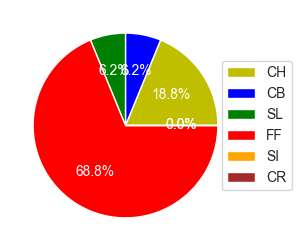

In [138]:
fig, ax = plt.subplots(figsize=(6, 3))
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"
wedges, texts, autotexts = ax.pie(LHB_pie_data[1:7], 
                                  colors=['y', 'b', 'g', 'r', 'orange', 'brown'],
                                  autopct=lambda pct: func(pct, LHB_pie_data),
                                  textprops=dict(color="w"))
ax.legend(wedges, pitch_types,
          loc="right",
          bbox_to_anchor=(0.75, 0, 0.5, 1))
plt.show()

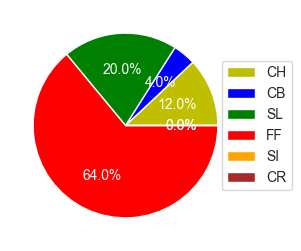

In [139]:
fig, ax = plt.subplots(figsize=(6, 3))
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"
wedges, texts, autotexts = ax.pie(RHB_pie_data[1:7], 
                                  colors=['y', 'b', 'g', 'r', 'orange', 'brown'],
                                  autopct=lambda pct: func(pct, RHB_pie_data),
                                  textprops=dict(color="w"))
ax.legend(wedges, pitch_types,
          loc="right",
          bbox_to_anchor=(0.75, 0, 0.5, 1))
plt.show()

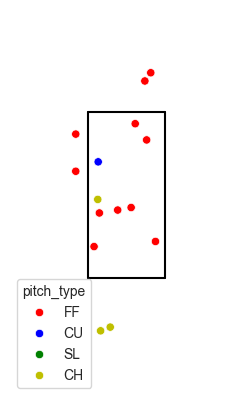

In [140]:
sns.set_style('white');
fig, ax = plt.subplots(figsize=(3, 5))
sns.scatterplot(
    data=pitcher_data[pitcher_data['stand'] == 'L'], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'SL': 'g', 'FF': 'r', 'SI': 'orange', 'CR': 'brown'});
plt.plot([-9.97/12, 9.97/12], [44.08/12, 44.08/12], color='k');
plt.plot([9.97/12, 9.97/12], [18.29/12, 44.08/12], color='k');
plt.plot([-9.97/12, 9.97/12], [18.29/12, 18.29/12], color='k');
plt.plot([-9.97/12, -9.97/12], [18.29/12, 44.08/12], color='k');
ax.set_xlim(left=-2.5, right=2.5);
ax.set_ylim(bottom=0, top=5);

plt.axis('off')

sns.despine(fig=fig, top=True, bottom=True, left=True, right=True);

plt.show()

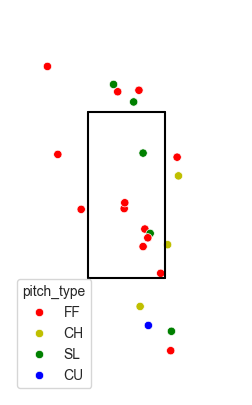

In [141]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(3, 5))
sns.scatterplot(
    data=pitcher_data[pitcher_data['stand'] == 'R'], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'SL': 'g', 'FF': 'r', 'SI': 'orange', 'CR': 'brown'});
plt.plot([-9.97/12, 9.97/12], [44.08/12, 44.08/12], color='k');
plt.plot([9.97/12, 9.97/12], [18.29/12, 44.08/12], color='k');
plt.plot([-9.97/12, 9.97/12], [18.29/12, 18.29/12], color='k');
plt.plot([-9.97/12, -9.97/12], [18.29/12, 44.08/12], color='k');
ax.set_xlim(left=-2.5, right=2.5);
ax.set_ylim(bottom=0, top=5);

plt.axis('off')

sns.despine(fig=fig, top=True, bottom=True, left=True, right=True);

plt.show()

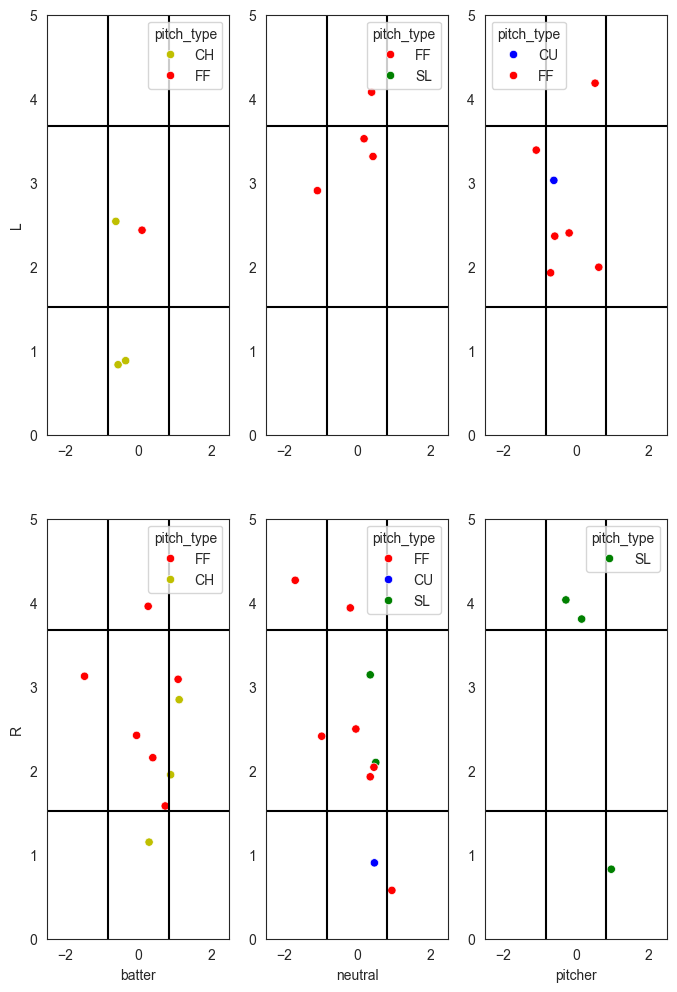

In [142]:


fig, ax = plt.subplots(2, 3, figsize=(8, 12))
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'L') & (pitcher_data['count_advantage'] == 'batter'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b', 'SL': 'g', 'FF': 'r', 'SI': 'orange', 'CR': 'brown'}, ax=ax[0, 0]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'L') & (pitcher_data['count_advantage'] == 'neutral'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b',  'SL': 'g', 'FF': 'r', 'SI': 'orange', 'CR': 'brown'}, ax=ax[0, 1]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'L') & (pitcher_data['count_advantage'] == 'pitcher'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b',  'SL': 'g', 'FF': 'r', 'SI': 'orange', 'CR': 'brown'}, ax=ax[0, 2]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'R') & (pitcher_data['count_advantage'] == 'batter'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b',  'SL': 'g', 'FF': 'r', 'SI': 'orange', 'CR': 'brown'}, ax=ax[1, 0]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'R') & (pitcher_data['count_advantage'] == 'neutral'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b',  'SL': 'g', 'FF': 'r', 'SI': 'orange', 'CR': 'brown'}, ax=ax[1, 1]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'R') & (pitcher_data['count_advantage'] == 'pitcher'), :], x="plate_x", y="plate_z", hue="pitch_type",
    palette={'CH': 'y', 'CU': 'b',  'SL': 'g', 'FF': 'r', 'SI': 'orange', 'CR': 'brown'}, ax=ax[1, 2]);
# plt.plot([-9.97/12, 9.97/12], [44.08/12, 44.08/12], color='k');
# plt.plot([9.97/12, 9.97/12], [18.29/12, 44.08/12], color='k');
# plt.plot([-9.97/12, 9.97/12], [18.29/12, 18.29/12], color='k');
# plt.plot([-9.97/12, -9.97/12], [18.29/12, 44.08/12], color='k');
# ax.set_xlim(left=-2.5, right=2.5);
# ax.set_ylim(bottom=0, top=5);

for i in range(2):
    for j in range(3):
        ax[i, j].axline((-9.97, 44.08/12), (9.97/12, 44.08/12), color='k');
        ax[i, j].axline((9.97/12, 18.29/12), (9.97/12, 44.08/12), color='k');
        ax[i, j].axline((-9.97/12, 18.29/12), (9.97/12, 18.29/12), color='k');
        ax[i, j].axline((-9.97/12, 18.29/12), (-9.97/12, 44.08/12), color='k');
        ax[i, j].set_xlim(left=-2.5, right=2.5);
        ax[i, j].set_ylim(bottom=0, top=5);

ax[0, 0].set_xlabel("");
ax[0, 0].set_ylabel("L");
ax[0, 1].set_xlabel("");
ax[0, 1].set_ylabel("");
ax[0, 2].set_xlabel("");
ax[0, 2].set_ylabel("");
ax[1, 0].set_ylabel("R");
ax[1, 0].set_xlabel("batter");
ax[1, 1].set_xlabel("neutral");
ax[1, 1].set_ylabel("");
ax[1, 2].set_xlabel("pitcher");
ax[1, 2].set_ylabel("");

plt.show()

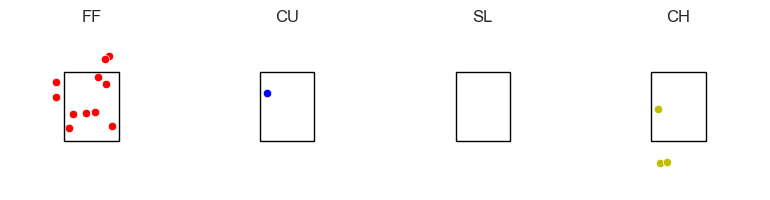

In [147]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'L') & (pitcher_data['pitch_type'] == 'FF'), :], x="plate_x", y="plate_z", color='r',
    ax=ax[0]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'L') & (pitcher_data['pitch_type'] == 'CU'), :], x="plate_x", y="plate_z", color='b',
    ax=ax[1]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'L') & (pitcher_data['pitch_type'] == 'SL'), :], x="plate_x", y="plate_z", color='g',
    ax=ax[2]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'L') & (pitcher_data['pitch_type'] == 'CH'), :], x="plate_x", y="plate_z", color='y',
    ax=ax[3]);

for i in range(4):
    # ax[i].axhspan(xmin=(-9.97/12), ymin=18.29/12, xmax=9.97/12, ymax=44.08/12, edgecolor='k', fill=False);
    ax[i].add_patch(Rectangle((-9.97/12, 18.29/12), (9.97/6), ((44.08-18.29)/12), edgecolor='k', fill=False, lw=1));
    ax[i].set_xlabel("");
    ax[i].set_ylabel("");
    ax[i].set_axis_off()
    ax[i].set_xlim(left=-2.5, right=2.5);
    ax[i].set_ylim(bottom=0, top=5);

ax[0].set_title("FF");
ax[1].set_title("CU");
ax[2].set_title("SL");
ax[3].set_title("CH");

plt.subplots_adjust(bottom=0.1, right=0.75, top=0.5)

plt.show()

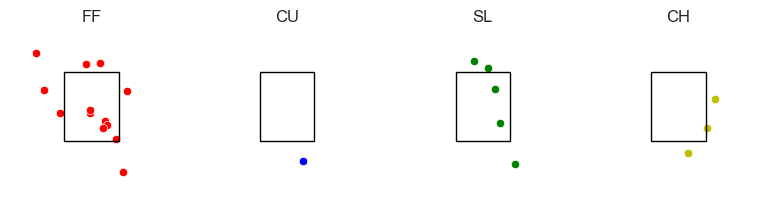

In [148]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'R') & (pitcher_data['pitch_type'] == 'FF'), :], x="plate_x", y="plate_z", color='r',
    ax=ax[0]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'R') & (pitcher_data['pitch_type'] == 'CU'), :], x="plate_x", y="plate_z", color='b',
    ax=ax[1]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'R') & (pitcher_data['pitch_type'] == 'SL'), :], x="plate_x", y="plate_z", color='g',
    ax=ax[2]);
sns.scatterplot(
    data=pitcher_data.loc[(pitcher_data['stand'] == 'R') & (pitcher_data['pitch_type'] == 'CH'), :], x="plate_x", y="plate_z", color='y',
    ax=ax[3]);

for i in range(4):
    # ax[i].axhspan(xmin=(-9.97/12), ymin=18.29/12, xmax=9.97/12, ymax=44.08/12, edgecolor='k', fill=False);
    ax[i].add_patch(Rectangle((-9.97/12, 18.29/12), (9.97/6), ((44.08-18.29)/12), edgecolor='k', fill=False, lw=1));
    ax[i].set_xlabel("");
    ax[i].set_ylabel("");
    ax[i].set_axis_off();
    ax[i].set_xlim(left=-2.5, right=2.5);
    ax[i].set_ylim(bottom=0, top=5);

ax[0].set_title("FF");
ax[1].set_title("CU");
ax[2].set_title("SL");
ax[3].set_title("CH");

plt.subplots_adjust(bottom=0.1, right=0.75, top=0.5)

plt.show()